In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import bs4
import numpy as np

In [2]:
url = 'https://www.mohfw.gov.in/'
resp = requests.get(url)
#print(resp.text)
soup=bs4.BeautifulSoup(resp.text,'html.parser')
all_rows=soup.find_all('tr')
def extract_td(row):
    td_list = []
    for i in row:
        td_list.append(i.text.replace('\n',''))
    return td_list
data_set = []
for row in all_rows:
    data_set.append(extract_td(row.find_all('td')))


In [3]:
table_data=data_set[1:-2]
piedata=data_set[-2][1:]

cols = ['Serial No.','States','Confirmed','Recoverd','Death']
dataframe = pd.DataFrame(data =table_data ,columns=cols)
dataframe
dataframe.Confirmed = dataframe.Confirmed.map(int)
dataframe.Recoverd = dataframe.Recoverd.map(int)
dataframe.Death = dataframe.Death.map(int)


Text(0, 0.5, 'State')

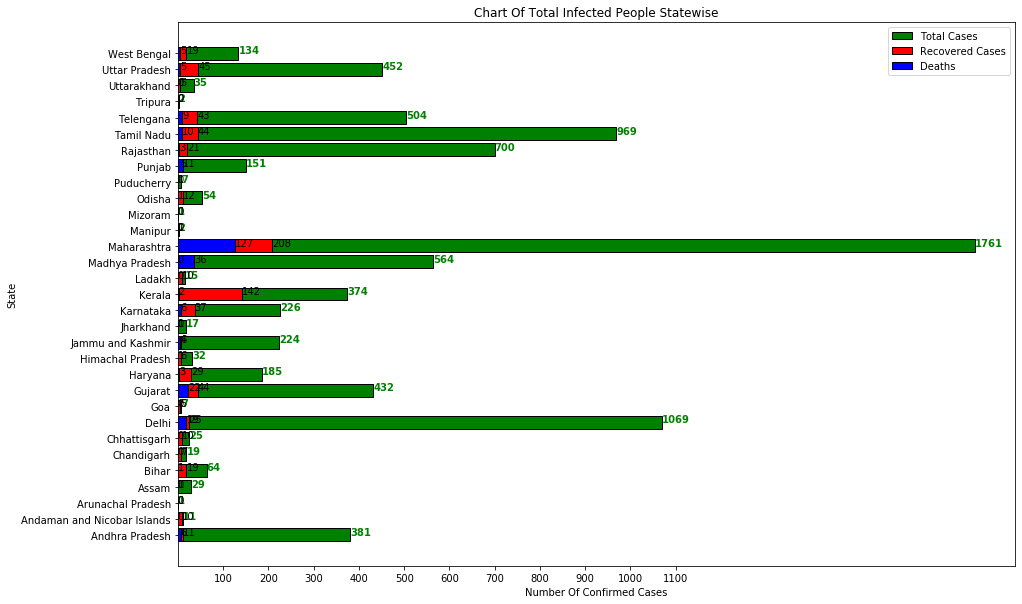

In [4]:
plt.figure(figsize=(15,10))
plt.barh(dataframe.States,dataframe.Confirmed,color='green',edgecolor='k')
plt.barh(dataframe.States,dataframe.Recoverd,color='red',edgecolor='k')
plt.barh(dataframe.States,dataframe.Death,color='blue',edgecolor='k')
plt.title("Chart Of Total Infected People Statewise")
plt.gca().legend(('Total Cases','Recovered Cases','Deaths'))
plt.xticks([100,200,300,400,500,600,700,800,900,1000,1100])
for index,value in enumerate(dataframe.Confirmed):
    plt.text(value,index,str(value),color='green',fontweight='bold')
for index,value in enumerate(dataframe.Recoverd):
    plt.text(value,index,str(value))
for index,value in enumerate(dataframe.Death):
    plt.text(value,index,str(value))
plt.xlabel("Number Of Confirmed Cases")
plt.ylabel("State")

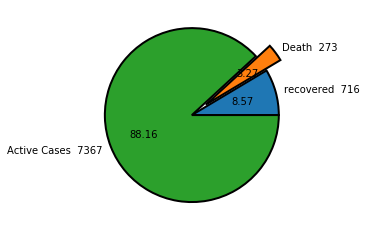

In [5]:
# draw pie chart using scraped table
l=[]
l.append(piedata[0][:-1])# separate list of total cases remove*
pie_data=l+piedata[1:] #complete list in str
final_list = [int(i) for i in pie_data]  # str to int
t=final_list[0] # cal active cases
r=final_list[1]
d=final_list[2]
a=t-r-d
o=final_list[1:] 
o.append(a)
o # final x for piechart
plt.pie(x=o,labels=['recovered'+'  '+str(r),'Death'+'  '+str(d),'Active Cases'+'  '+str(a)],wedgeprops={'linewidth':2,'edgecolor':'k'},autopct='%.2f',explode=(0,0.2,0))
plt.show()

# pie chat using scraping
----------------------------

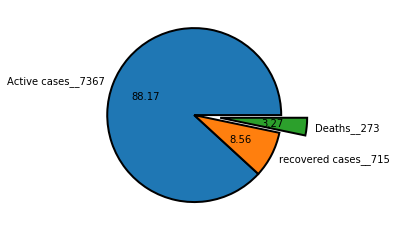

In [6]:
h=soup.find_all('strong')
list_cases=[]
for i in h[6:9]:
    list_cases.append(i.text)
final_list = [int(i) for i in list_cases] 
plt.pie(x=final_list,labels=['Active cases__'+list_cases[0],'recovered cases__'+list_cases[1],'Deaths__'+list_cases[2]],wedgeprops={'linewidth':2,'edgecolor':'k'},autopct='%.2f',explode=(0,0,0.3))
plt.show()

comparision country wise
----------------------------

In [7]:
url = 'https://www.worldometers.info/coronavirus/#countries'
web = requests.get(url)
web = web.content
soup = bs4.BeautifulSoup(web,'html.parser')
all_rows=soup.find_all('tr')
def extract_td(row):
    td_list = []
    for i in row:
        td_list.append(i.text.replace('\n',''))
    return td_list
data_set = []
for row in all_rows:
    data_set.append(extract_td(row.find_all('td')))
numpy_data = np.array(data_set)     # complete data with continent wise
d=[]          # extract only 2 columns
for i in numpy_data[8:]:
    d.append(i[0:2])
df = pd.DataFrame(data=d,columns=['Country','Total_Cases'])
#df              # contain data of all countries only name and total cases

comparision of top 30 infected countries
-----------------------------------------

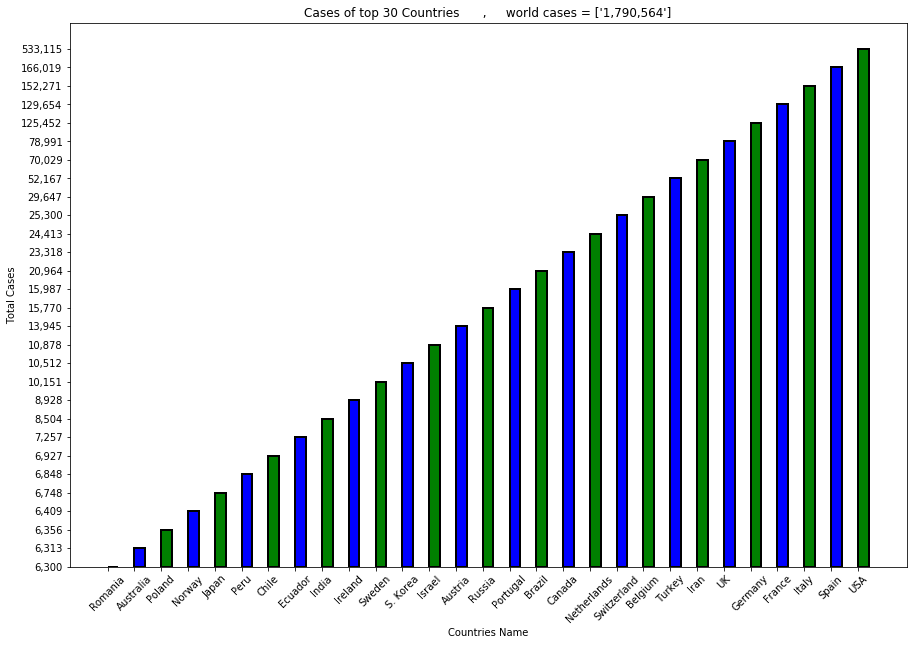

In [8]:
required_data=df.iloc[1:30,:]
world=df.iloc[0:1,:]
y1=world.Total_Cases.values
y=required_data.Total_Cases.values
x=required_data.Country.values
y=y[::-1] 
x=x[::-1] 
plt.figure(figsize=(15,10))
plt.bar(x,height=y,edgecolor='k',width=0.4,align='edge',linewidth=2,color=['g','b'],)
plt.xticks(rotation=45)
plt.title('Cases of top 30 Countries      ,     world cases = '+str(y1))
plt.xlabel("Countries Name")
plt.ylabel("Total Cases")
plt.show()

In [9]:
c=[]           # continents data
for i in numpy_data[1:8]:
    c.append(i[0:2])
df1 = pd.DataFrame(data=c,columns=['Continent','Total_Cases'])
df1


Continent Total_Cases
0  North America     569,587
1         Europe     861,276
2           Asia     288,848
3  South America      48,103
4        Oceania       7,730
5         Africa      14,299
6                        721